In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install kafka-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip uninstall kafka-python

Found existing installation: kafka-python 2.0.2
Uninstalling kafka-python-2.0.2:
  Would remove:
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/*
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka_python-2.0.2.dist-info/*
  Would not remove (might be manually added):
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/client.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/common.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/consumer/base.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/consumer/multiprocess.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/consumer/simple.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/context.py
    /home/ubuntu/my_project_dir/my_project_env/lib/python3.9/site-packages/kafka/partition

In [24]:
import findspark
findspark.init()

In [25]:
from kafka import KafkaConsumer
import matplotlib.pyplot as plt
import json
import threading

In [26]:
consumer = KafkaConsumer('bidPriceOutput',
                         group_id='bidPriceOutput',
                         bootstrap_servers=['localhost:9092'],
                        )
print("consumer started ...")

consumer started ...


In [27]:
x = {}

In [28]:
def plot():
    global x
    for message in consumer:
        x[json.loads((message.value).decode("utf-8"))["quoteTimestamp"]] = json.loads((message.value).decode("utf-8"))["bidPrice"]

In [29]:
plot_thread = threading.Thread(target=plot)

In [30]:
plot_thread.start()

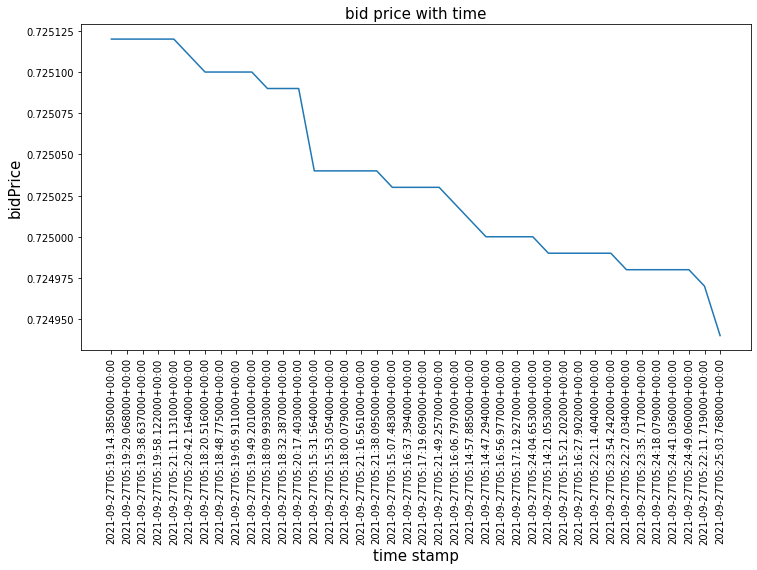

In [40]:
try:
    fig = plt.figure(figsize = (12, 6))
    x = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))

    plt.plot([*x.keys()][:40], [*x.values()][:40])

    plt.xlabel("time stamp", fontsize=15)
    plt.ylabel("bidPrice", fontsize=15)
    plt.title("bid price with time", fontsize=15)
    plt.xticks(rotation = 90)
    plt.show()
except:
    print(f"atleast 10 data needed but {len(x)} data is there")